In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/TSLA-train.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [15]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce')
data = data.dropna()
trainData = data.iloc[:,4:5].values

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2798 entries, 0 to 2797
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2798 non-null   object 
 1   Open       2798 non-null   float64
 2   High       2798 non-null   float64
 3   Low        2798 non-null   float64
 4   Close      2798 non-null   float64
 5   Adj Close  2798 non-null   float64
 6   Volume     2798 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 174.9+ KB


In [17]:
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(2798, 1)

In [54]:
X_train = []
y_train = []

for i in range (60,2798): #60 : timestep // 2798 : length of the data
    X_train.append(trainData[i-60:i,0]) 
    y_train.append(trainData[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

In [56]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
X_train.shape

(2738, 60, 1)

In [31]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [32]:
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20
86/86 - 19s - loss: 0.0032 - 19s/epoch - 225ms/step
Epoch 2/20
86/86 - 16s - loss: 0.0015 - 16s/epoch - 191ms/step
Epoch 3/20
86/86 - 12s - loss: 0.0014 - 12s/epoch - 141ms/step
Epoch 4/20
86/86 - 12s - loss: 0.0012 - 12s/epoch - 138ms/step
Epoch 5/20
86/86 - 12s - loss: 8.4445e-04 - 12s/epoch - 136ms/step
Epoch 6/20
86/86 - 12s - loss: 8.2538e-04 - 12s/epoch - 135ms/step
Epoch 7/20
86/86 - 12s - loss: 0.0015 - 12s/epoch - 143ms/step
Epoch 8/20
86/86 - 13s - loss: 7.6778e-04 - 13s/epoch - 151ms/step
Epoch 9/20
86/86 - 11s - loss: 8.8957e-04 - 11s/epoch - 133ms/step
Epoch 10/20
86/86 - 12s - loss: 6.1145e-04 - 12s/epoch - 137ms/step
Epoch 11/20
86/86 - 12s - loss: 8.7761e-04 - 12s/epoch - 136ms/step
Epoch 12/20
86/86 - 12s - loss: 7.3223e-04 - 12s/epoch - 145ms/step
Epoch 13/20
86/86 - 12s - loss: 6.3196e-04 - 12s/epoch - 137ms/step
Epoch 14/20
86/86 - 12s - loss: 7.0389e-04 - 12s/epoch - 137ms/step
Epoch 15/20
86/86 - 11s - loss: 6.2785e-04 - 11s/epoch - 134ms/step
Epoch 16/

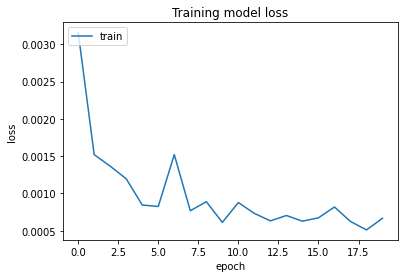

In [33]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [34]:
testData = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/TSLA-test.csv")
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values 
#input array for the model
inputClosing = testData.iloc[:,0:].values 
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length):  
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(288, 60, 1)

In [35]:
y_pred = model.predict(X_test)
y_pred

9/9 [==============================] - 2s 38ms/step


array([[1.0632578 ],
       [1.0837433 ],
       [1.0997726 ],
       [1.110221  ],
       [1.111921  ],
       [1.098835  ],
       [1.0772852 ],
       [1.0533599 ],
       [1.0304626 ],
       [1.0104282 ],
       [0.99726975],
       [0.99393225],
       [0.99956536],
       [1.0130543 ],
       [1.0314075 ],
       [1.0472313 ],
       [1.0577106 ],
       [1.0607125 ],
       [1.060853  ],
       [1.0609747 ],
       [1.0591033 ],
       [1.054622  ],
       [1.0445291 ],
       [1.0300843 ],
       [1.016722  ],
       [1.0084447 ],
       [1.002256  ],
       [0.9976648 ],
       [0.99152446],
       [0.9833268 ],
       [0.97533154],
       [0.96628714],
       [0.9571353 ],
       [0.9471564 ],
       [0.9394593 ],
       [0.9396429 ],
       [0.9514214 ],
       [0.9732926 ],
       [0.99870527],
       [1.0212545 ],
       [1.0364567 ],
       [1.0429735 ],
       [1.0510213 ],
       [1.059664  ],
       [1.0636398 ],
       [1.0607054 ],
       [1.0503607 ],
       [1.037

In [76]:
predicted_price = sc.inverse_transform(y_pred)
predicted_price[287]

array([143.48984], dtype=float32)

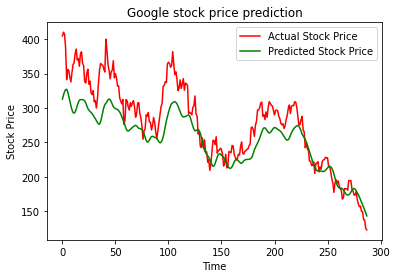

In [37]:
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()